#  <u>***Week 1 : Crime Rate Dataset Analysis .***</u>

In [127]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)
import seaborn as sns;sns.set()
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
from datetime import datetime,time

---
---

## <u>***Importing data***</u>

In [128]:
df=pd.read_csv(r"C:\Users\Omar\Desktop\SiTeck\Month_1\Week_1\DataFiles\Crime_Rate_Data_Baltimore.csv")
df.head()

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Location 1,Total Incidents
0,11/12/2016,02:35:00,3B,300 SAINT PAUL PL,ROBBERY - STREET,O,NaN,111.0,CENTRAL,Downtown,"(39.2924100000, -76.6140800000)",1
1,11/12/2016,02:56:00,3CF,800 S BROADWAY,ROBBERY - COMMERCIAL,I,FIREARM,213.0,SOUTHEASTERN,Fells Point,"(39.2824200000, -76.5928800000)",1
2,11/12/2016,03:00:00,6D,1500 PENTWOOD RD,LARCENY FROM AUTO,O,NaN,413.0,NORTHEASTERN,Stonewood-Pentwood-Winston,"(39.3480500000, -76.5883400000)",1
3,11/12/2016,03:00:00,6D,6600 MILTON LN,LARCENY FROM AUTO,O,NaN,424.0,NORTHEASTERN,Westfield,"(39.3626300000, -76.5516100000)",1
4,11/12/2016,03:00:00,6E,300 W BALTIMORE ST,LARCENY,O,NaN,111.0,CENTRAL,Downtown,"(39.2893800000, -76.6197100000)",1


---
---

## <u>***Data shape***</u>

In [129]:
print("The data set has",df.shape[0],"rows, and",df.shape[1],"features\nThis means the Date set has in total",df.size,"elemensts or cells")

The data set has 285807 rows, and 12 features
This means the Date set has in total 3429684 elemensts or cells


---
---

## <u>***Data types***</u>

In [130]:
df.dtypes

CrimeDate           object
CrimeTime           object
CrimeCode           object
Location            object
Description         object
Inside/Outside      object
Weapon              object
Post               float64
District            object
Neighborhood        object
Location 1          object
Total Incidents      int64
dtype: object

---
---

## <u>***Data info***</u>

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285807 entries, 0 to 285806
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CrimeDate        285807 non-null  object 
 1   CrimeTime        285807 non-null  object 
 2   CrimeCode        285807 non-null  object 
 3   Location         284184 non-null  object 
 4   Description      285807 non-null  object 
 5   Inside/Outside   281611 non-null  object 
 6   Weapon           97396 non-null   object 
 7   Post             285616 non-null  float64
 8   District         285749 non-null  object 
 9   Neighborhood     284106 non-null  object 
 10  Location 1       284188 non-null  object 
 11  Total Incidents  285807 non-null  int64  
dtypes: float64(1), int64(1), object(10)
memory usage: 26.2+ MB


---

>  <font color=red>---> *obviously we need to to do some cleaning* </font>

---
---

##  <u> ***Data Cleaning***  </u>

### *A1. <br> Colums names cleaning: (converting all to small letters and add "_" in spaces between words)*

In [132]:
df.columns

Index(['CrimeDate', 'CrimeTime', 'CrimeCode', 'Location', 'Description',
       'Inside/Outside', 'Weapon', 'Post', 'District', 'Neighborhood',
       'Location 1', 'Total Incidents'],
      dtype='object')

In [133]:
import janitor
df=df.clean_names()

In [134]:
df.columns

Index(['crimedate', 'crimetime', 'crimecode', 'location', 'description',
       'inside_outside', 'weapon', 'post', 'district', 'neighborhood',
       'location_1', 'total_incidents'],
      dtype='object')

### *A2. <br> Colums names cleaning: (convert all strings into small letters to increase the readability)*

In [135]:
df=df.apply(lambda x:x.astype(str).str.lower())
df.head()

,crimedate,crimetime,crimecode,location,description,inside_outside,weapon,post,district,neighborhood,location_1,total_incidents
0,11/12/2016,02:35:00,3b,300 saint paul pl,robbery - street,o,nan,111.0,central,downtown,"(39.2924100000, -76.6140800000)",1
1,11/12/2016,02:56:00,3cf,800 s broadway,robbery - commercial,i,firearm,213.0,southeastern,fells point,"(39.2824200000, -76.5928800000)",1
2,11/12/2016,03:00:00,6d,1500 pentwood rd,larceny from auto,o,nan,413.0,northeastern,stonewood-pentwood-winston,"(39.3480500000, -76.5883400000)",1
3,11/12/2016,03:00:00,6d,6600 milton ln,larceny from auto,o,nan,424.0,northeastern,westfield,"(39.3626300000, -76.5516100000)",1
4,11/12/2016,03:00:00,6e,300 w baltimore st,larceny,o,nan,111.0,central,downtown,"(39.2893800000, -76.6197100000)",1


### *A3. <br> Duplicated Data Removing :*

In [136]:
print(f"The the nuber of duplicated rows : {df.duplicated().sum()}")

The the nuber of duplicated rows : 11404


In [137]:
df.drop_duplicates(inplace=True)

---

### *B. <br> na-values :*

#### *The number of missing data :*

In [138]:
print("The total number of na_values are :",df.isna().sum().sum())
print()
print("The number of na-values in each features are :")
df.isna().sum()

The total number of na_values are : 0

The number of na-values in each features are :


crimedate          0
crimetime          0
crimecode          0
location           0
description        0
inside_outside     0
weapon             0
post               0
district           0
neighborhood       0
location_1         0
total_incidents    0
dtype: int64

>  <font color=red>----> *It looks like there is no na-values ,but we have noticed that there is values =="nan" as a string object,
>  also some features have wrong string spilling*</font>

---

### *C.  Features cleaning  :*


#### *C1: <br>The Feature "district" <br><br> Some of the categories has wrong spilling , one category has the value "nan" as string ,will remove the categoty with the value =="gay street"*

In [139]:
pd.DataFrame(df["district"].value_counts()).reset_index()

,district,count
0,northeastern,43249
1,southeastern,37634
2,central,32337
3,southern,31524
4,northern,30903
5,northwestern,27668
6,southwestern,25131
7,eastern,23157
8,western,22269
9,northestern,271


#####  *C1.1 <br> we will Change "Northestern","Southestern","northestern","southestern" into "Northeastern","Southeastern","northwestern","southeastern" as the splilling is wrong*

In [140]:
df["district"].replace(["Northestern","Southestern","northestern","southestern"],["Northeastern","Southeastern","northwestern","southeastern"],inplace=True)

##### *C1.2 <br> we will drop the -gay street & nan - as its is not clear and only 58 in total*

In [141]:
df= df.drop(df[df["district"].isin(["gay street","nan"])].index)

In [142]:
pd.DataFrame(df["district"].value_counts()).reset_index()

,district,count
0,northeastern,43249
1,southeastern,37836
2,central,32337
3,southern,31524
4,northern,30903
5,northwestern,27939
6,southwestern,25131
7,eastern,23157
8,western,22269


##### *C1.3 <br> Visualizing district Feature :*

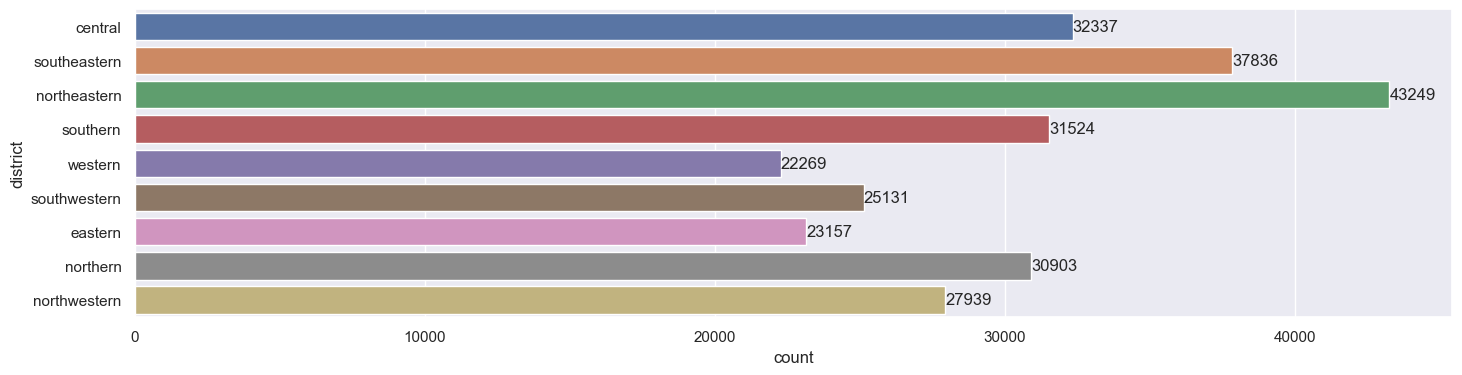

In [143]:
fig, ax = plt.subplots(figsize=(17, 4))
sns.countplot(y=df["district"],ax=ax)
for label in ax.containers:
    ax.bar_label(label)

#### *C2: The Feature "weapon". <br><br> One category has the value "nan" as string so we will replce it with the most frequent weapon used "*

##### *C2.1:<br> Replcing the "nan" with the most frequent weapon used*

In [144]:
pd.DataFrame(df["weapon"].value_counts()).reset_index()

,weapon,count
0,nan,185387
1,hands,48076
2,firearm,18260
3,other,13315
4,knife,9307


In [145]:
df["weapon"].replace("nan","hands",inplace=True)
pd.DataFrame(df["weapon"].value_counts()).reset_index()

,weapon,count
0,hands,233463
1,firearm,18260
2,other,13315
3,knife,9307


##### *C2.2 <br> Visualizing weapon feature :*

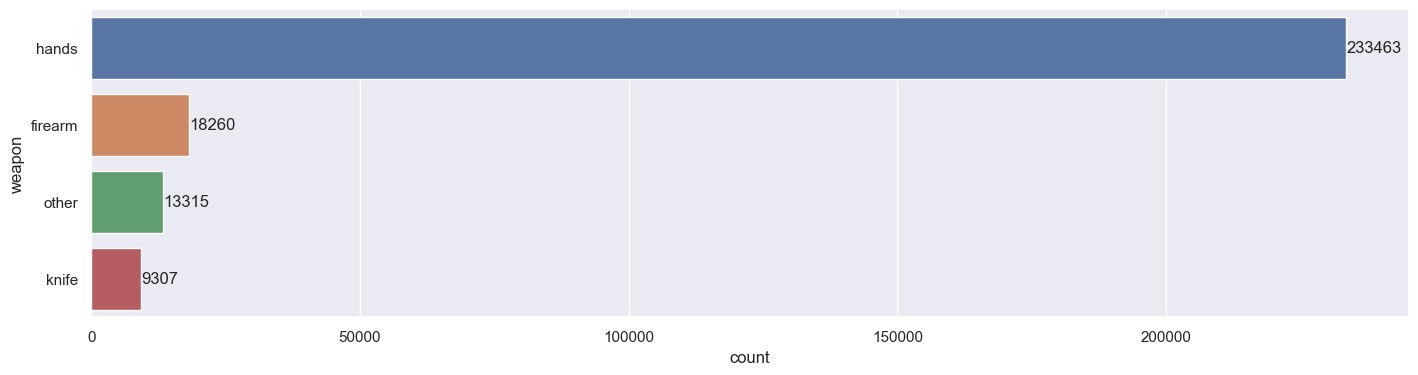

In [146]:
fig, ax = plt.subplots(figsize=(17, 4))
sns.countplot(y=df["weapon"])
for label in ax.containers:
    ax.bar_label(label)

#### *C3. <br>The Feature "inside_outside" : <br><br>Will replace the values ["i","o"] with ["inside","outside"] & replace the "nan" with the most frequent value*

##### *C3.1 <br>Replacing the values ["i","o"] with ["inside","outside"] & replacing the "nan" with the most frequent value*

In [147]:
print("The number of unique categories before cleaning are :\n") 
pd.DataFrame(df["inside_outside"].value_counts()).reset_index()

The number of unique categories before cleaning are :



,inside_outside,count
0,i,136715
1,o,129922
2,nan,3927
3,outside,3160
4,inside,621


In [148]:
df["inside_outside"].replace(["i","o","nan"],["inside","outside","inside"],inplace=True)

In [149]:
print("The number of unique categories before cleaning are :\n") 
pd.DataFrame(df["inside_outside"].value_counts()).reset_index()

The number of unique categories before cleaning are :



,inside_outside,count
0,inside,141263
1,outside,133082


##### *C3.2 <br>Visualizing inside_outside Feature*

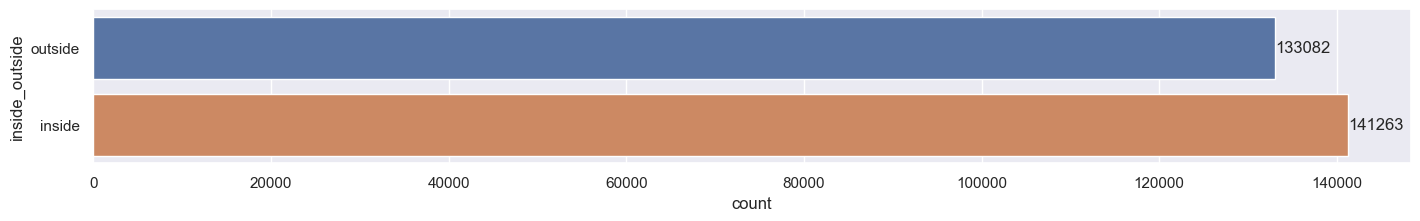

In [150]:
fig, ax = plt.subplots(figsize=(17, 2))
sns.countplot(y=df["inside_outside"])
for label in ax.containers:
    ax.bar_label(label)

#### *C4. <br>The Feature "description" <br>Will strip the values and make sure they have no spaces in the start and the end*

##### *C4.1 <br>Stripping the values*

In [151]:
pd.DataFrame(df["description"].value_counts()).reset_index()

,description,count
0,larceny,61746
1,common assault,44348
2,burglary,44180
3,larceny from auto,38210
4,auto theft,26970
5,agg. assault,25222
6,robbery - street,15715
7,robbery - commercial,3679
8,assault by threat,3454
9,robbery - residence,2584


In [152]:
df["description"]=df['description'].str.lstrip()
df["description"]=df['description'].str.rstrip()
df["description"]=df['description'].str.strip(".")
df["description"]=df["description"].str.replace("-","")

##### *C4.2 <br>Visualizing description Feature*

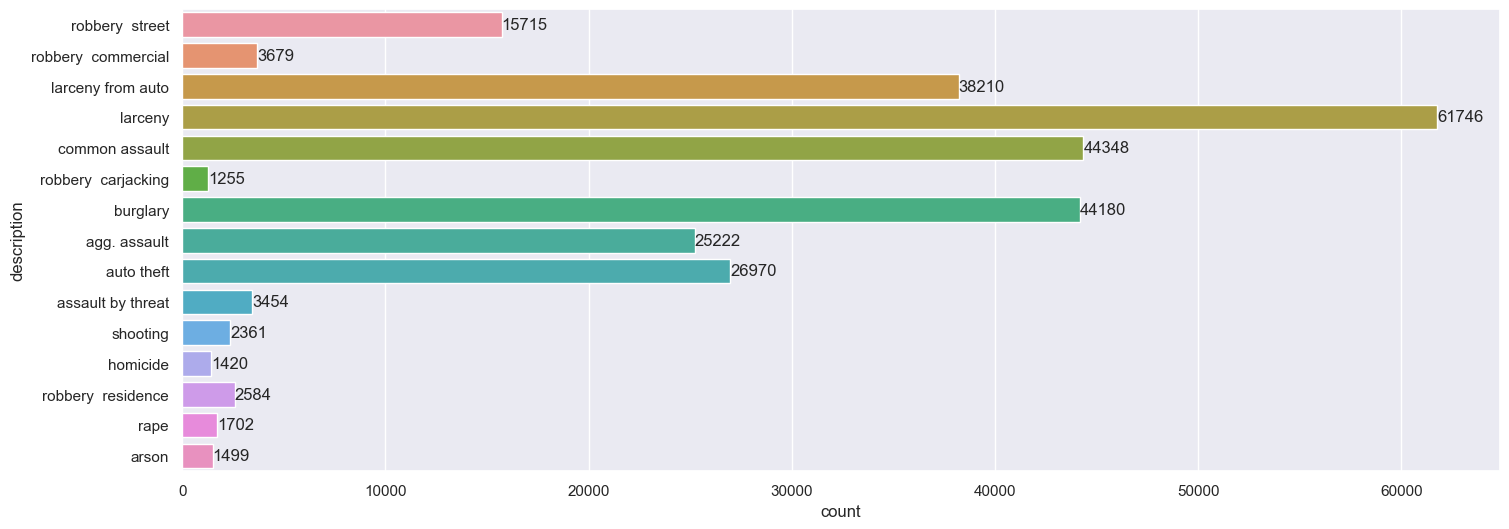

In [153]:
fig, ax = plt.subplots(figsize=(17, 6))
sns.countplot(y=df["description"])
for label in ax.containers:
    ax.bar_label(label)

#### *C5. <br>The Features ["location,"locatio_1","neighbourhood"] <br>Will remove all "nan" values and "a" values from df["location,"locatio_1","neighbourhood"] as this can not be replaced randomly.<br> Also; will assign the new dataset to a new name called data*

In [154]:
df2=df.drop(df[df["location"].isin(["nan"])].index)
df3=df2.drop(df2[df2["neighborhood"].isin(["nan"])].index)
df4=df3.drop(df3[df3["location_1"].isin(["a"])].index)
data=df4

In [155]:
print(f"The feature 'neighborhood' has {data['neighborhood'].nunique()} nunique neighborhoods") 
print(f"The feature 'location' has {data['location'].nunique()} nunique locations") 
print(f"The feature 'location_1' has {data['location_1'].nunique()} nunique location_1s") 

The feature 'neighborhood' has 279 nunique neighborhoods
The feature 'location' has 25693 nunique locations
The feature 'location_1' has 97899 nunique location_1s


> #### <font color=red>*Note: <br> We could visualize the count of these categories du to the high number of levels in.*</font>

---
---

### *D. <br>Data Types check :*

In [156]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 272755 entries, 0 to 285806
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   crimedate        272755 non-null  object
 1   crimetime        272755 non-null  object
 2   crimecode        272755 non-null  object
 3   location         272755 non-null  object
 4   description      272755 non-null  object
 5   inside_outside   272755 non-null  object
 6   weapon           272755 non-null  object
 7   post             272755 non-null  object
 8   district         272755 non-null  object
 9   neighborhood     272755 non-null  object
 10  location_1       272755 non-null  object
 11  total_incidents  272755 non-null  object
dtypes: object(12)
memory usage: 27.1+ MB


> #### <font color =red>*Important observations :*</font>
> - <font color =red>The crimedate feature to be converted to datetime type.</font>
> - <font color =red> The crimetime feature to be converted to time type </font>
> - <font color =red> The total_incidents feature to be converted to int type. </font>

#### *D1 <br>converting crimedate feature to datetime type*

In [157]:
data["crimedate"]=pd.to_datetime(data["crimedate"])

#### *D2 <br>converting crimetime feature to time type*

##### *D2 Steps:<br>A. will assume the time format is as %H %M %S ---> we will find that some values are not in the same format (have no %S value,and have no colons in between)--->will fix that <br>B. will find one value have wrong timing "24:00:00" so  will fix that and change it to "00:00:00"<br>C. convert the feature to time*

In [158]:
# Format Fixing 
data["crimetime"]=data["crimetime"].apply(lambda x:x[0:2]+":"+x[2:]+":"+"00" if len(x)==4 else x)

In [159]:
# changing the value "24:00:00"  to  "00:00:00" 
data[data["crimetime"]== "24:00:00"]=data[data["crimetime"]== "24:00:00"].replace("24:00:00","00:00:00") 

In [160]:
# # convert the feture to time 
# data["crimetime"]=pd.to_datetime(data["crimetime"],format='%H:%M:%S').dt.time


##### *D3 <br> converting total_incidents feature to time type*

In [161]:
data["total_incidents"]=data["total_incidents"].astype("int64")

---
---

## <u>***The Questions:***</u>

### *WHAT ARE THE QUESTIONS I NEED TO ANSWER BY THIS DATASET:*
#### *A. General Questions*

##### *A1.<br> How many total incidents are recorded in the dataset?*

In [162]:
data["total_incidents"].sum()

272755

##### *A2. <br> What is the earliest crimedate in the dataset?*

In [163]:
data["crimedate"].max()

Timestamp('2016-11-12 00:00:00')

##### *A3. <br> What is the latest crimedate in the dataset?*

In [164]:
data["crimedate"].min()

Timestamp('2011-01-01 00:00:00')

----

#### *B. Questions about Types of Crime*

##### *B1.<br> What are the unique crimecodes listed in the dataset?*

In [165]:
data["crimecode"].unique()

array(['3b', '3cf', '6d', '6e', '4e', '3co', '3bj', '5a', '4b', '7a',
       '3af', '6g', '4f', '4c', '6b', '6c', '4d', '3d', '5b', '6j', '3ak',
       '3ao', '3ajk', '5d', '6f', '3ajf', '5c', '4a', '9s', '1f', '3jf',
       '3k', '3ck', '3p', '3jo', '3lf', '5e', '3ajo', '6a', '3nf', '6l',
       '3ek', '2a', '5f', '3h', '3go', '3no', '7c', '3nk', '2b', '8av',
       '8ao', '8h', '1k', '8eo', '3jk', '3gf', '3ef', '3lo', '8gv', '3m',
       '8j', '8bv', '1o', '8bo', '6h', '8i', '3gk', '3f', '7b', '8fo',
       '3eo', '8cv', '8ev', '8go', '3lk', '8co', '6k', '8fv', '3n', '8do'],
      dtype=object)

##### *B2. <br> Which crimecode has the highest occurrence?*

In [166]:
pd.DataFrame(data["crimecode"].value_counts().head().sort_values(ascending=False)).reset_index().iloc[0]

crimecode       4e
count        44078
Name: 0, dtype: object

##### *B3. <br> How many incidents involved weapons?*

In [167]:
pd.DataFrame(data.groupby("weapon")["total_incidents"].count()).reset_index()

,weapon,total_incidents
0,firearm,18211
1,hands,231986
2,knife,9289
3,other,13269


---

#### C. *Time-Based Questions*

##### *C1. <br> How many crimes occurred between 9:00 AM and 5:00 PM?*

In [168]:
data[data["crimetime"].between("09:00:00", "17:00:00", inclusive = "both")]["total_incidents"].sum()  # when the format is string

108151

##### *C2. <br> What day of the week has the most recorded incidents?*

In [169]:
data["year"]=data["crimedate"].dt.year
data["month"]=data["crimedate"].dt.month
data["quarter"]=data["crimedate"].dt.quarter
data["day"]=data["crimedate"].dt.day
data["day_name"]=data["crimedate"].dt.day_name()
data["month_name"]=data["crimedate"].dt.month_name()

In [170]:
data.groupby("day_name")["total_incidents"].value_counts().sort_values(ascending=False)

day_name   total_incidents
Friday     1                  41413
Monday     1                  39916
Wednesday  1                  39021
Tuesday    1                  39009
Thursday   1                  38710
Saturday   1                  38323
Sunday     1                  36363
Name: count, dtype: int64

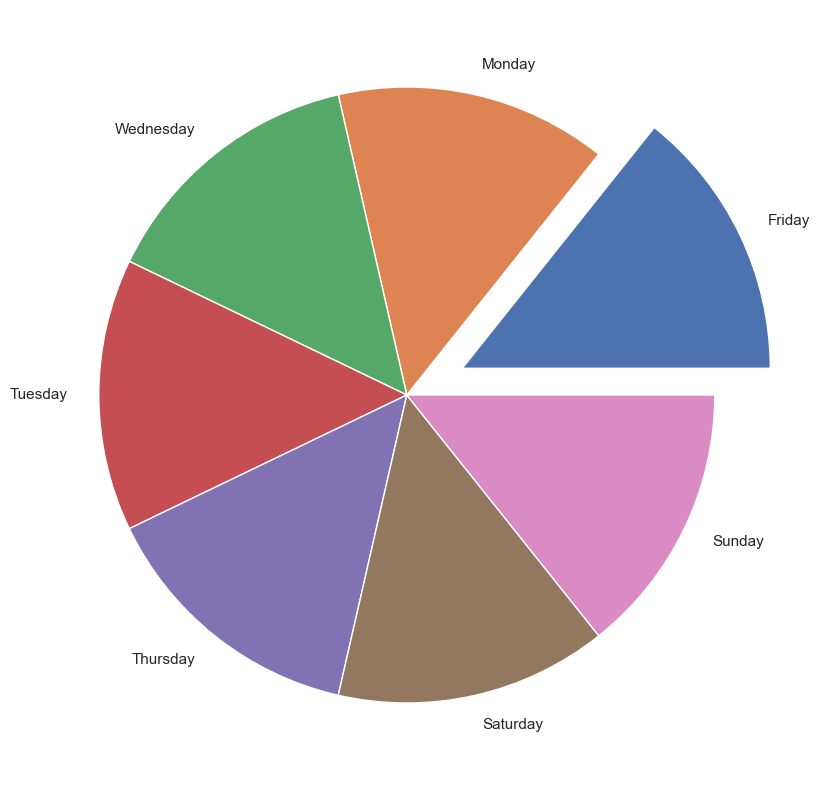

In [171]:
explode = [0.2, 0, 0, 0,0,0,0]
plt.pie(data=pd.DataFrame(data.groupby("day_name")["total_incidents"].value_counts().sort_values(ascending=False)).reset_index(), 
        labels="day_name",x="total_incidents",explode=explode);

##### *C3. <br> Which season (winter, summer, autumn, spring) had the least and most incidents?*

In [172]:
## creating seasons data:
seasons = {
    1: 'WINTER',
    2: 'WINTER',
    3: 'SPRING',
    4: 'SPRING',
    5: 'SPRING',
    6: 'SUMMER',
    7: 'SUMMER',
    8: 'SUMMER',
    9: 'FALL',
    10: 'FALL',
    11: 'FALL',
    12: 'WINTER'
}
data["season"] = data["month"].apply(lambda x: seasons[x].lower())

In [173]:
data.groupby("season")["total_incidents"].sum().sort_values(ascending=True)

season
winter    57046
spring    69316
fall      70583
summer    75810
Name: total_incidents, dtype: int64

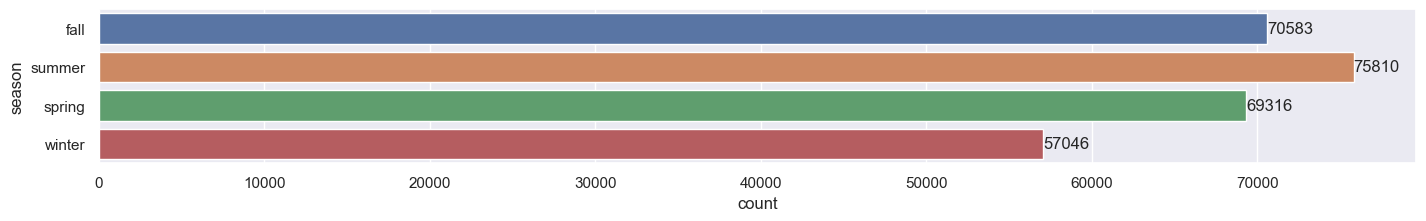

In [174]:
fig, ax = plt.subplots(figsize=(17, 2))
sns.countplot(y=data["season"])
for label in ax.containers:
    ax.bar_label(label)

##### *C4. <br> Are there specific crimetimes that have a higher frequency of incidents?*

In [175]:
pd.DataFrame(data.groupby("crimetime")["total_incidents"].count().sort_values(ascending=False).head(10)).reset_index()

,crimetime,total_incidents
0,18:00:00,6925
1,17:00:00,6624
2,16:00:00,6181
3,12:00:00,6069
4,20:00:00,6039
5,21:00:00,5831
6,15:00:00,5773
7,19:00:00,5747
8,22:00:00,5622
9,14:00:00,4830


##### *C5. <br>  When do most inside crimes happen during the day?*

In [176]:
pd.DataFrame(data[data["inside_outside"]=="inside"].groupby(["inside_outside","crimetime"])["total_incidents"].sum().sort_values(ascending=False).head(10))

total_incidents
inside_outside crimetime                 
inside         12:00:00              3735
               17:00:00              3169
               15:00:00              3096
               16:00:00              3041
               18:00:00              2801
               14:00:00              2716
               13:00:00              2613
               08:00:00              2507
               10:00:00              2486
               09:00:00              2480

<Axes: ylabel='inside_outside,crimetime'>

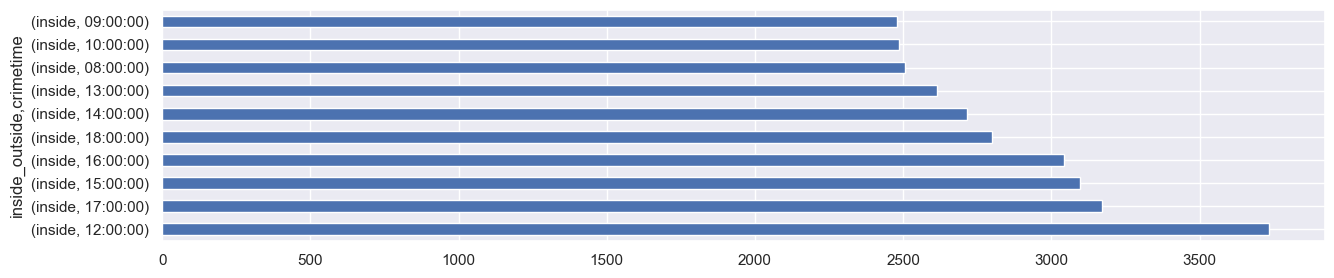

In [177]:
data[data["inside_outside"]=="inside"].groupby(["inside_outside","crimetime"])["total_incidents"].sum().sort_values(ascending=False).head(10).plot(kind="barh",figsize=(15,3))

---

#### *D. Location-Based Questions*

##### *D1. <br> What are the top 5 locations where crimes occurred?*

In [178]:
data.groupby("location")["total_incidents"].sum().sort_values(ascending=False).head()

location
200 e pratt st     638
300 light st       578
3200 tioga pw      428
1500 russell st    409
1200 w pratt st    381
Name: total_incidents, dtype: int64

##### *D2. <br> Which district has the highest number of incidents?*

In [179]:
data.groupby("district")["total_incidents"].sum().sort_values(ascending=False)

district
northeastern    43249
southeastern    37634
central         32173
southern        31332
northern        30628
northwestern    27551
southwestern    24984
eastern         23032
western         22172
Name: total_incidents, dtype: int64

##### *D3. <br> Are there any neighborhoods that appear to be particularly safe or particularly at-risk?*

In [180]:
print("The top 5 neighborhoodsthat appear to be perticularly safe are :\n")
data.groupby("neighborhood")["total_incidents"].sum().sort_values(ascending=True).head()

The top 5 neighborhoodsthat appear to be perticularly safe are :



neighborhood
northeastern                1
dundalk marine terminal     1
blythewood                  5
mt pleasant park           11
greenmount cemetery        22
Name: total_incidents, dtype: int64

In [181]:
print("The top 5 neighborhoodsthat appear to be perticularly at-risk are :\n")
data.groupby("neighborhood")["total_incidents"].sum().sort_values(ascending=False).head()

The top 5 neighborhoodsthat appear to be perticularly at-risk are :



neighborhood
downtown               9195
frankford              6558
belair-edison          5921
brooklyn               4320
sandtown-winchester    3958
Name: total_incidents, dtype: int64

---

#### *E. Descriptive Questions*

##### *D1. <br> What are the most common descriptions for crimes in the dataset?*

In [182]:
data.groupby("description")["description"].value_counts().sort_values(ascending=False)

description
larceny                61393
common assault         44078
burglary               44008
larceny from auto      37845
auto theft             26770
agg. assault           25175
robbery  street        15585
robbery  commercial     3672
assault by threat       3435
robbery  residence      2571
shooting                2361
rape                    1701
arson                   1493
homicide                1420
robbery  carjacking     1248
Name: count, dtype: int64

##### *D2. <br> How often did crimes occur inside versus outside*

In [183]:
print("inside crimes occures more often than outside crimes as below :")
print("\n",
((data.groupby("inside_outside")["inside_outside"].count())/data["inside_outside"].count())*100)

inside crimes occures more often than outside crimes as below :

 inside_outside
inside     51.585855
outside    48.414145
Name: inside_outside, dtype: float64


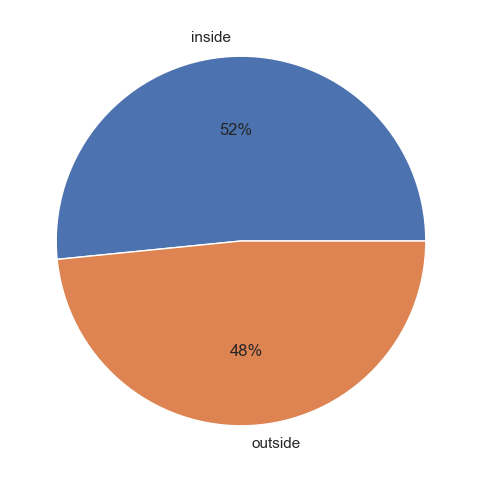

In [184]:
plt.figure(figsize=(20, 6))
plt.pie(data=pd.DataFrame(data.groupby("inside_outside")["total_incidents"].count()).reset_index(), 
        labels="inside_outside",x="total_incidents",autopct='%.0f%%');


---

#### *F. Questions Regarding Law Enforcement*

##### *F1. <br> Are there specific police posts that have a higher number of incidents reported?*

In [185]:
print("Suppose we considered the Top 5 police posts that have higher number of inside incidents reported ;\nWe will find that police post number 111.0 has the highest number of incidents reported by almost two times compared to the 2nd post:")
      
print("\n",data.groupby("post")["total_incidents"].count().sort_values(ascending=False).head())
 

Suppose we considered the Top 5 police posts that have higher number of inside incidents reported ;
We will find that police post number 111.0 has the highest number of incidents reported by almost two times compared to the 2nd post:

 post
111.0    9287
212.0    4715
211.0    4304
432.0    4296
922.0    4290
Name: total_incidents, dtype: int64


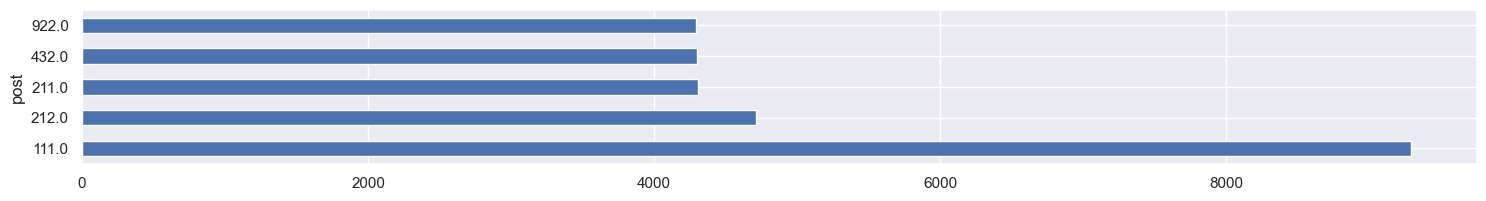

In [186]:
data.groupby("post")["total_incidents"].count().sort_values(ascending=False).head().plot(kind="barh",figsize=(18,2));

---

#### *G. Combined Queries*

##### *G1. <br> Are incidents involving weapons more likely to occur inside or outside?*

In [187]:
pd.pivot_table(data=pd.DataFrame(data.groupby(["inside_outside","weapon"])["total_incidents"].sum().sort_values(ascending=False)),
               columns="weapon",index="inside_outside",fill_value="total_incidents")

## ----  or

pd.crosstab(data["inside_outside"],data["weapon"])

weapon,firearm,hands,knife,other
inside_outside,,,,
inside,5111,123855,4569,7168
outside,13100,108131,4720,6101


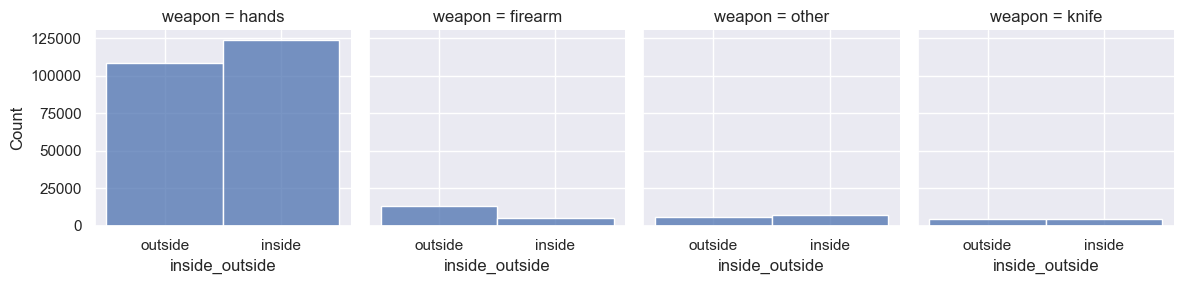

In [188]:
sns.set_theme(style="darkgrid")
sns.displot(
    df4, x="inside_outside", col="weapon",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
);

##### *G2. <br> In which district and neighborhood combination do the most violent crimes (based on description or weapon used) occur?*

The most violent crimes (based on description) occur in district and neighborhood in combination is :
                                    description
district neighborhood description             
central  downtown     larceny             2882 



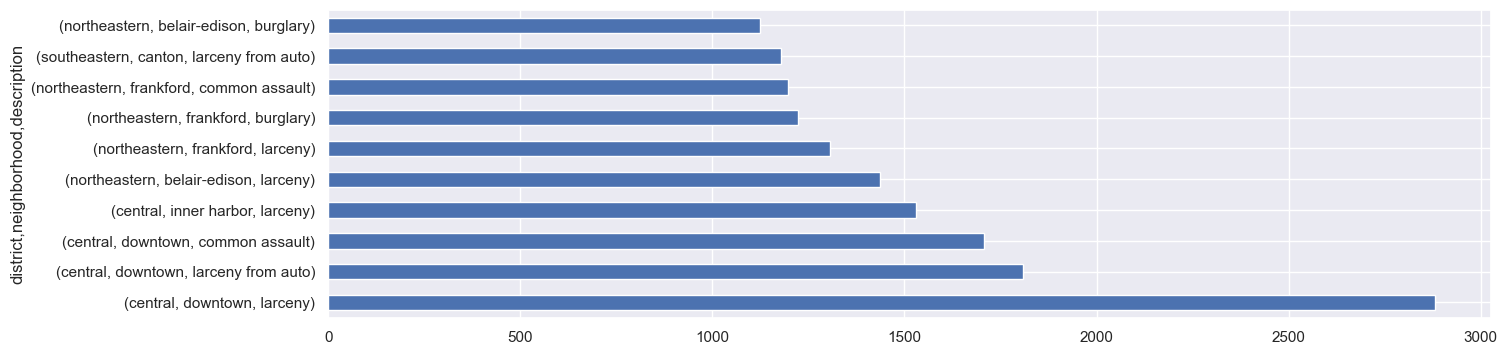

In [189]:
print("The most violent crimes (based on description) occur in district and neighborhood in combination is :\n",
pd.DataFrame(data.groupby(["district","neighborhood","description"])["description"].count().sort_values(ascending=False).head(1)),"\n")

data.groupby(["district","neighborhood","description"])["description"].count().sort_values(ascending=False).head(10).plot(kind="barh",
             figsize=(15,4));

The most violent crimes (based on description) occur in district and neighborhood in combination is :
                               weapon
district neighborhood weapon        
central  downtown     hands     7948 



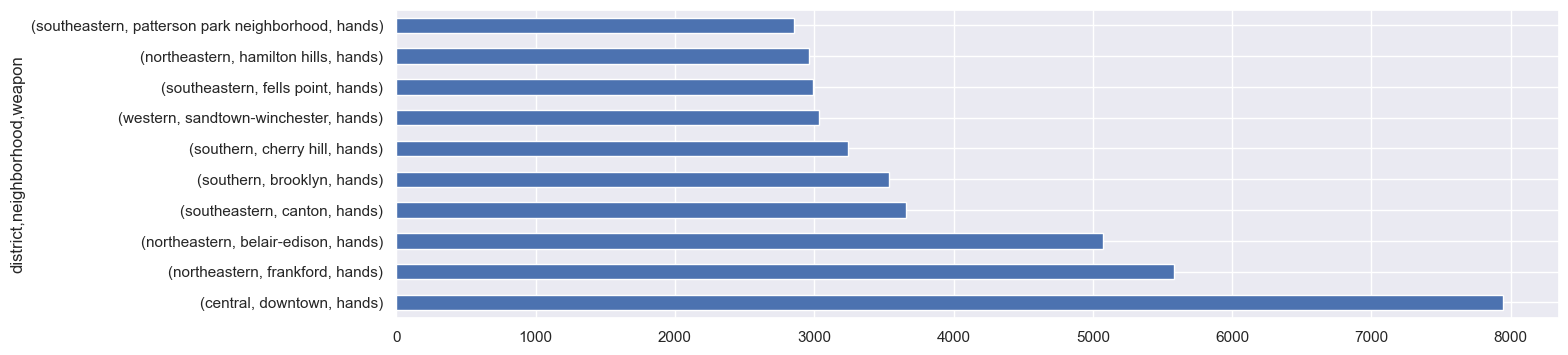

In [190]:
print("The most violent crimes (based on description) occur in district and neighborhood in combination is :\n",
pd.DataFrame(data.groupby(["district","neighborhood","weapon"])["weapon"].count().sort_values(ascending=False).head(1)),"\n")
      
data.groupby(["district","neighborhood","weapon"])["weapon"].count().sort_values(ascending=False).head(10).plot(kind="barh",
             figsize=(15,4));

##### *G3. <br> Is there a seasonal trend in the types of crimes committed (e.g., more thefts in summer)?*

##### *G3 Steps:<br>A. will creat new data frame with the total incident grouped by crimedate & description <br>B. will reshape the datafrane using pd.pivot function <br>C. will fill the na values with 0<br>D.will resampling the data using rule="MS" which meand month start<br>E.looking for any seasonal trend*

In [191]:
ts_description=pd.DataFrame(data.groupby(["crimedate","description"])["total_incidents"].sum()).reset_index()
pivoted_ts_description=pd.pivot(columns="description",data=ts_description,values="total_incidents",index="crimedate")
pivoted_ts_description.fillna(0,inplace=True)
pivoted_ts_description=pivoted_ts_description.astype("int64")
pivoted_ts_description

description,agg. assault,arson,assault by threat,auto theft,burglary,common assault,homicide,larceny,larceny from auto,rape,robbery carjacking,robbery commercial,robbery residence,robbery street,shooting
crimedate,,,,,,,,,,,,,,,
2011-01-01,27,1,0,15,21,39,2,39,27,3,0,2,1,4,1
2011-01-02,6,0,0,7,19,13,1,20,20,1,0,2,0,9,2
2011-01-03,12,0,0,8,21,15,0,19,15,3,0,2,1,7,0
2011-01-04,11,0,2,10,12,26,0,27,11,1,0,1,1,2,2
2011-01-05,9,0,2,11,28,26,1,30,14,1,0,2,1,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-11-08,12,0,3,9,19,13,1,27,12,0,1,0,1,4,2
2016-11-09,8,0,6,18,26,13,2,26,11,0,0,4,1,8,2
2016-11-10,5,0,0,16,24,8,0,21,19,0,1,1,2,9,0


> #### <font color =red>*By looking at the seasonality plots we can see that all crims discreption have seasonal trend<br>also, by applying the adfuller test, if the p-value is more than 0.05 the data is seasonal*</font>

In [192]:
# from statsmodels.tsa.seasonal import seasonal_decompose
# seasonal_decompose(pivoted_ts_description_MS["common assault"]).plot();

In [193]:
pivoted_ts_description_MS=pivoted_ts_description.resample(rule="MS").mean()  # resampling the data using rule "MS"-"Month start"

In [194]:
from statsmodels.tsa.stattools import adfuller
i=0
for x in pivoted_ts_description_MS:
     results=adfuller(pivoted_ts_description_MS.values[:,i])[1]
     if results > 0.05:
       print(pivoted_ts_description_MS.columns[i] ," ",results)
     i +=1


agg. assault   0.5724113386450526
auto theft   0.37190081537441466
common assault   0.5687494138401334
larceny from auto   0.8601820850576987
rape   0.47276169757383363
robbery  carjacking   0.9656788871102593
robbery  commercial   0.5299630052623112
robbery  street   0.1362053114812043
shooting   0.9255592015153319


## *Simple Moving Average  SMA-  common assault*

<Axes: xlabel='crimedate'>

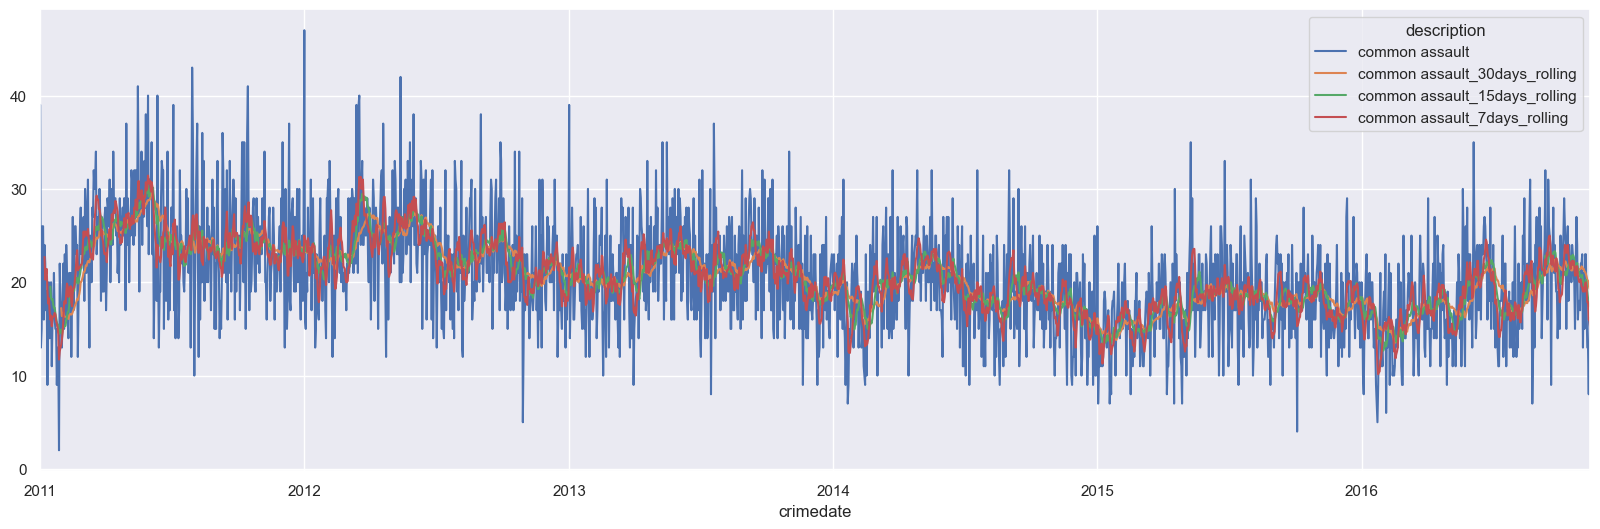

In [195]:
# pivoted_ts_description['seasonal_robbery_residence']=pivoted_ts_description['robbery  residence'].resample(rule="MS",).sum()
pivoted_ts_description["common assault_30days_rolling"]=pivoted_ts_description["common assault"].rolling(window=30).mean()
pivoted_ts_description["common assault_15days_rolling"]=pivoted_ts_description["common assault"].rolling(window=15).mean()
pivoted_ts_description["common assault_7days_rolling"]=pivoted_ts_description["common assault"].rolling(window=7).mean()
pivoted_ts_description[["common assault","common assault_30days_rolling","common assault_15days_rolling","common assault_7days_rolling"]].plot(figsize=(20,6))

## *Cumulative Moving Average  CMA-  common assault*

<Axes: xlabel='crimedate'>

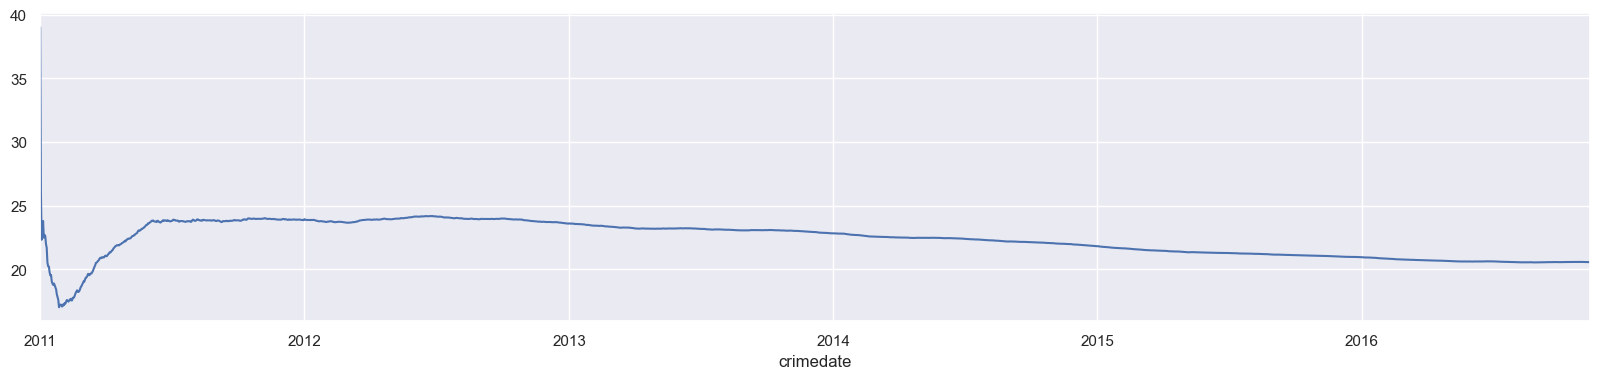

In [196]:
pivoted_ts_description["common assault"].expanding().mean().plot(figsize=(20,4))

## *Exponentail Moving Average  EMA-  common assault*

<Axes: xlabel='crimedate'>

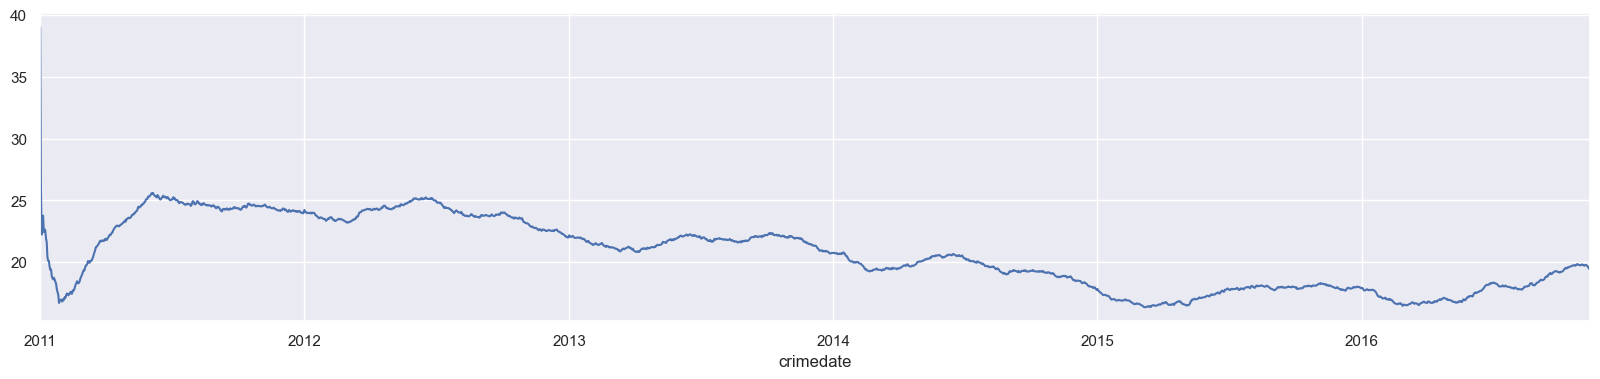

In [197]:
## alpha =0.01 is a smoothing factor
pivoted_ts_description["common assault"].ewm(alpha=0.01).mean().plot(figsize=(20,4))

## *Exponentail Moving Weight Average  EMWA-  common assault*

<Axes: xlabel='crimedate'>

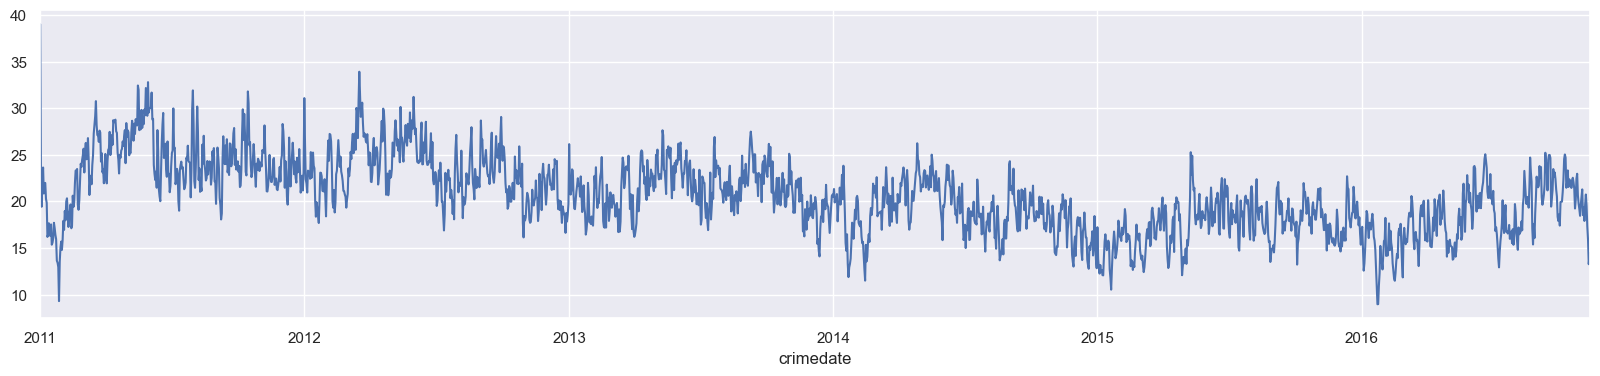

In [198]:
## span 
pivoted_ts_description["common assault"].ewm(span=5).mean().plot(figsize=(20,4))

### *Applying Arima & Sarima*

*will consider the feature "common assault"*

In [199]:
from statsmodels.tsa.stattools import adfuller
test=adfuller(pivoted_ts_description_MS["common assault"])
test

(-1.4280660610251898,
 0.5687494138401334,
 12,
 58,
 {'1%': -3.548493559596539,
  '5%': -2.912836594776334,
  '10%': -2.594129155766944},
 226.21338921843386)

##### The data is not stationary --> will start making differincing

In [200]:
test=adfuller(pivoted_ts_description_MS["common assault"].diff(1).dropna())
test

(-3.4083191685044345,
 0.010678519928973215,
 11,
 58,
 {'1%': -3.548493559596539,
  '5%': -2.912836594776334,
  '10%': -2.594129155766944},
 226.84121402107237)

##### The data is stationary 

<Axes: xlabel='crimedate'>

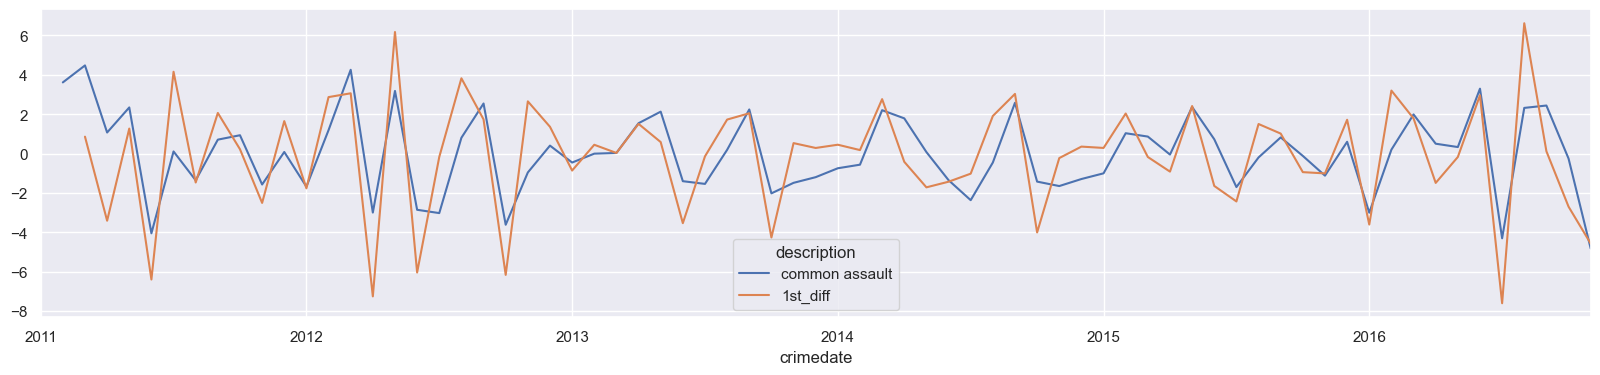

In [201]:
pivoted_ts_description_MS["1st_diff"]=pivoted_ts_description_MS["common assault"].diff(1).dropna()

pivoted_ts_description_MS[["common assault","1st_diff"]].diff(1).plot(figsize=(20,4))

In [202]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf,plot_predict,acf,pacf

#### *Arima*

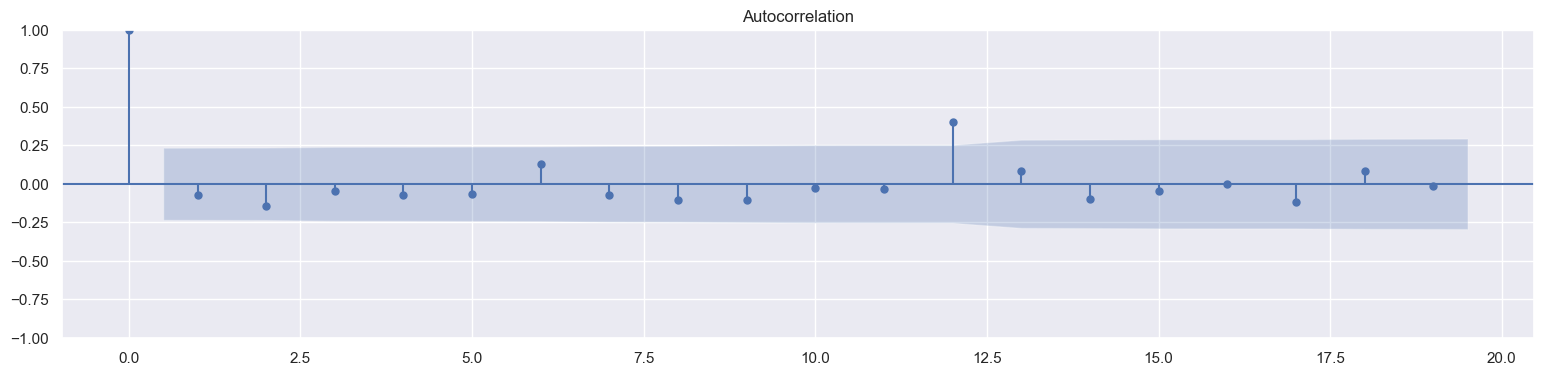

In [203]:
plot_acf(pivoted_ts_description_MS["common assault"].diff(1).dropna()).set_size_inches(19,4);

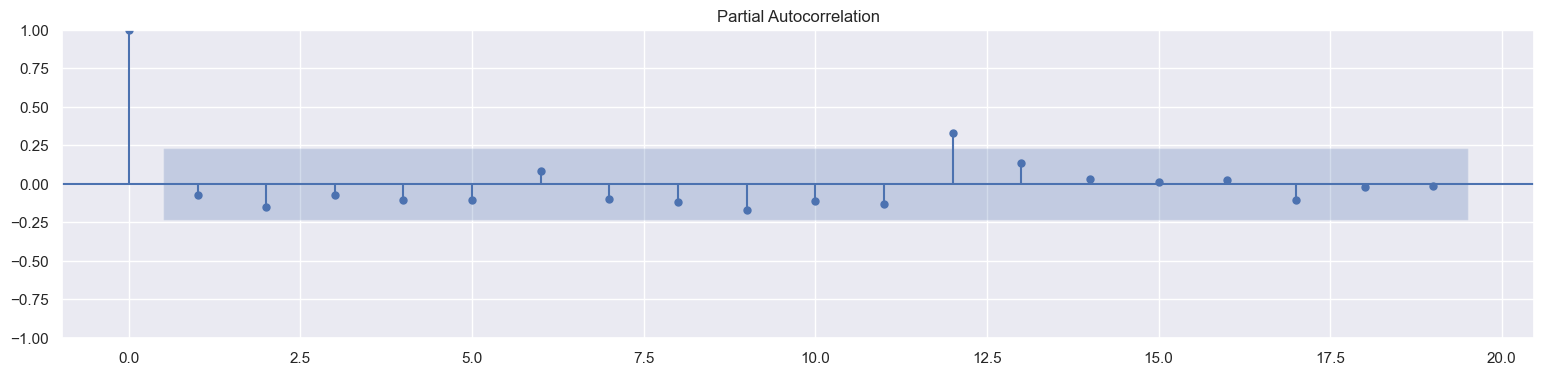

In [204]:
plot_pacf(pivoted_ts_description_MS["common assault"].diff(1).dropna()).set_size_inches(19,4);

-----> the (p,i,q)  (0,1,0)

In [205]:
import statsmodels.api as sm


In [206]:
modul_arima=sm.tsa.ARIMA(pivoted_ts_description_MS["common assault"],order=(0,1,0)).fit()   
print(modul_arima.summary())

                               SARIMAX Results                                
Dep. Variable:         common assault   No. Observations:                   71
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -148.738
Date:                Fri, 15 Sep 2023   AIC                            299.476
Time:                        06:00:23   BIC                            301.724
Sample:                    01-01-2011   HQIC                           300.369
                         - 11-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         4.1032      0.752      5.459      0.000       2.630       5.577
Ljung-Box (L1) (Q):                   0.38   Jarque-Bera (JB):                 0.32
Prob(Q):                              0.54   Pr

<Axes: ylabel='Density'>

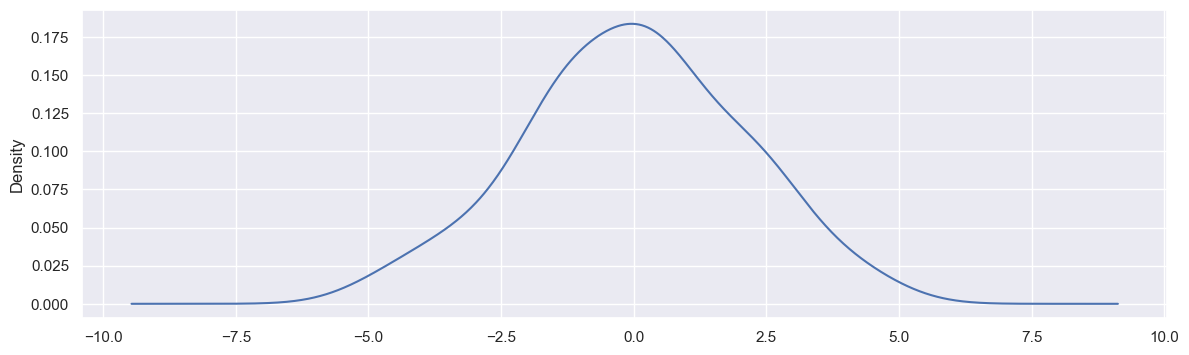

In [207]:
modul_arima.resid[1:].plot(kind="kde",figsize=(14,4))

# Prediction

In [208]:
from datetime import datetime,timedelta
train_data_end=datetime(2015,1,1)
test_data_end=datetime(2016,11,1)

In [209]:
train_data=pivoted_ts_description_MS[:train_data_end]
test_data=pivoted_ts_description_MS[train_data_end+timedelta(days=1):test_data_end]

In [210]:
prediction_start_date=test_data.index[0]
prediction_end_date=test_data.index[-1]

In [211]:
Prediction_arima=modul_arima.predict(start=prediction_start_date,end=prediction_end_date)

In [212]:
test_data["prediction_arima"]=Prediction_arima

<Axes: xlabel='crimedate'>

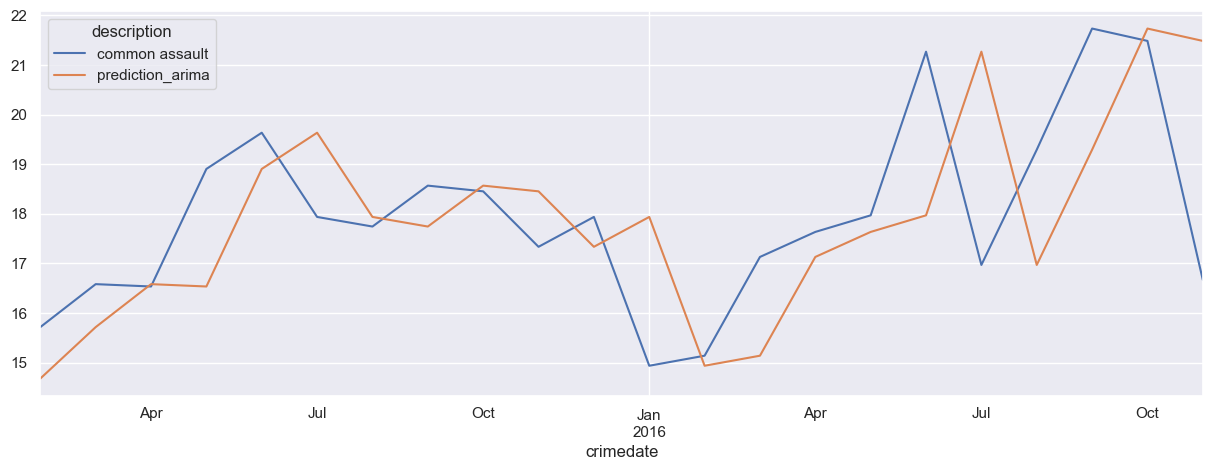

In [213]:
test_data[["common assault","prediction_arima"]].plot(figsize=(15,5))

### sarima

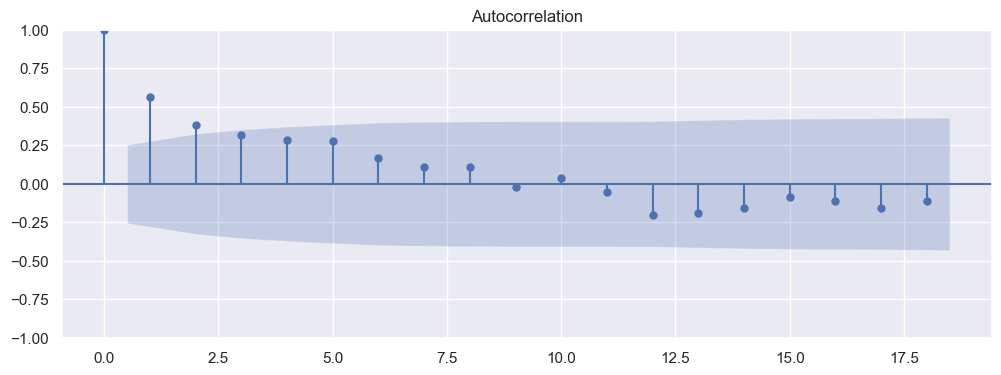

In [214]:
plot_acf(pivoted_ts_description_MS["common assault"].diff(12).dropna()).set_size_inches(12,4);

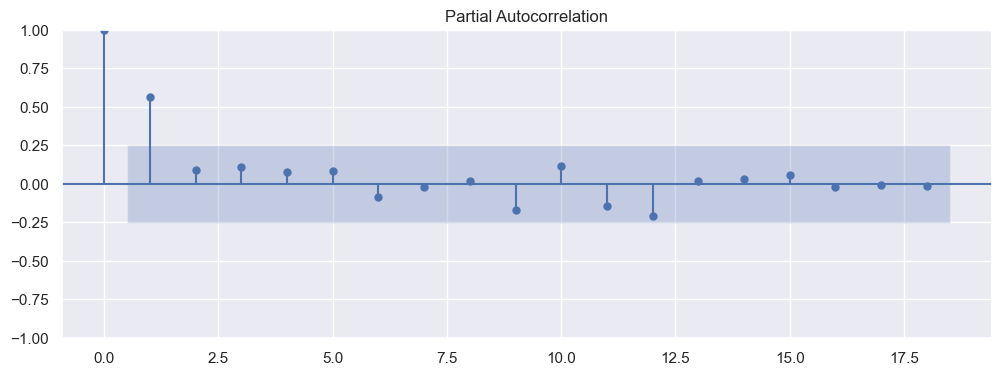

In [215]:
plot_pacf(pivoted_ts_description_MS["common assault"].diff(12).dropna()).set_size_inches(12,4);

In [228]:
modul_sarimax=sm.tsa.SARIMAX(pivoted_ts_description_MS["common assault"],order=(1,0,2),seasonal_order=(0,1,0,12)).fit()
print(modul_sarimax.summary())

                                      SARIMAX Results                                      
Dep. Variable:                      common assault   No. Observations:                   71
Model:             SARIMAX(1, 0, 2)x(0, 1, [], 12)   Log Likelihood                -114.183
Date:                             Fri, 15 Sep 2023   AIC                            236.366
Time:                                     06:04:57   BIC                            244.676
Sample:                                 01-01-2011   HQIC                           239.609
                                      - 11-01-2016                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9149      0.081     11.304      0.000       0.756       1.074
ma.L1         -0.3828      

> #### <font color =red>*Note:<br>seasonal_order=(0,1,0,12) for 1 time differencing and 12 for seasonality<br> order=(1,0,2) the new (p,d,q) values when using diffirencing as 12 (the d value is 0 as this is seasonal modul so 12 ==0 in season)*</fornt>

<Axes: ylabel='Density'>

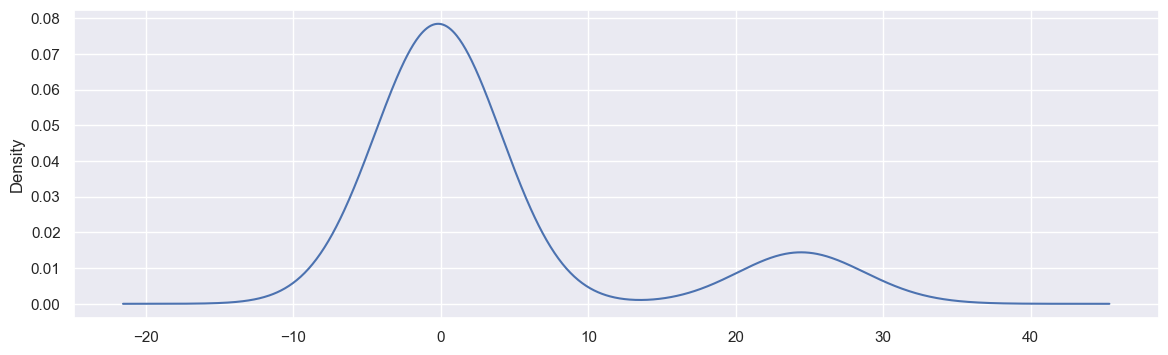

In [229]:
modul_sarimax.resid[1:].plot(kind="kde",figsize=(14,4))

# Prediction

In [230]:
Prediction_sarimax=modul_sarimax.predict(start=prediction_start_date,end=prediction_end_date)

In [231]:
test_data["prediction_sarimax"]=Prediction_sarimax

<Axes: xlabel='crimedate'>

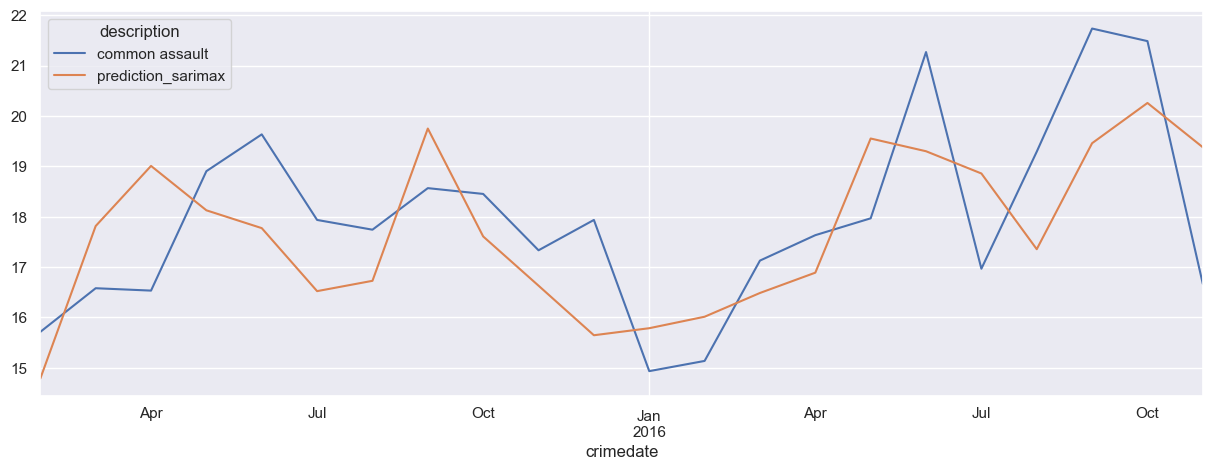

In [232]:
test_data[["common assault","prediction_sarimax"]].plot(figsize=(15,5))

---

In [233]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [234]:
mean_absolute_error(test_data["common assault"],Prediction_arima)

1.502932551319648

In [235]:
np.sqrt(mean_squared_error(test_data["common assault"],Prediction_arima))

2.028991133189852

In [236]:
mean_absolute_error(test_data["common assault"],Prediction_sarimax)

1.4281415835235074

In [237]:
np.sqrt(mean_squared_error(test_data["common assault"],Prediction_sarimax))

1.5611221107959992

----> modul_sarimax has less errors ----> accepted